# EO-Forge Loaders 1.0.1

## EO-Forge Loaders

__NOTE__: EO-Forge Loaders are meant to be used on a "local" arxiving scheme (your laptop storage, a NFS storage,etc) not (__yet__) on Cloud Buckets, but more on this latter!

We will cover the basics steps to load an scene (and crop some roi-_region of interest_- on it) of:

-  Landsat 5 (historic arxiving - decomissioned)
-  Landsat 8 (on-duty)
-  Sentinel 2 (on-duty)

### Images

We assume that you have already downloaded some images (we cover the download steps from GCP in other [notebook](./eo-forge-gcp-downloader.ipynb)):

- Landsat 5/8 - Path/Row : 230/094
- Sentinel2 - Tile: 19FCF

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#
import rasterio as rio
import geopandas as gpd

#
from earthpy import plot

In [2]:
from eo_forge.io.LandsatLoaders import LandsatLoader
from eo_forge.io.SentinelLoaders import Sentinel2Loader

In [3]:
# Base dir
TMP_PROD = "./products-int/"
# IMAGES RAW Search Path
IMAGES_RAW = os.path.join(TMP_PROD, "images-raw")
#
# IMAGES CROP Path (to leave cropped files - if appy)
PROD_INT_DIR = os.path.join(TMP_PROD, "images-crop")
os.makedirs(PROD_INT_DIR, exist_ok=True)

## Landsat 5 Image

### No bbox

We will query and calibrate the whole image and we will return it as a file (not in memory).

__NOTE__: Image Raw _LT05_L1TP_230094_20111011_20161005_01_T1_ or with the same path/row should exist on IMAGES_RAW dir.

In [4]:
# Init Loader and query bands
LANDSAT5_BANDS = ["B1", "B2", "B3", "B4", "B5"]
lp = LandsatLoader(IMAGES_RAW, bands=LANDSAT5_BANDS, spacecraft=5)

2022/02/09 11:50:41 - INFO - Running on Landsat 5 data


That is, we have instantiated the Loader with:
- folder: IMAGE_RAW, the place where we look for products (see later)
- bands: list of bands that we require to be processed
- spacecraft: 5 or 8 (stands for Landsat 5 or 8)
- resolution: leave default @ 30 meters
- reflectance: leave default as True so calculate reflectance @ TOA (otherwise calculate radiance)

And now call the processor for the requested product-id:

In [5]:
product_id = "LT05_L1TP_230094_20111011_20161005_01_T1"
res_ = lp.execute(
    product_id,
    bbox=None,
    folder_proc_=PROD_INT_DIR,
    raster_return_open=False,
    write_file="_complete",
)

2022/02/09 11:50:41 - INFO - Processing on ./products-int/images-raw/LT05_L1TP_230094_20111011_20161005_01_T1 dir
2022/02/09 11:50:41 - INFO - Using clipping flag: False
2022/02/09 11:50:41 - INFO - PROCESSING band: B1
2022/02/09 11:50:42 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:50:42 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:50:42 - INFO - calibrating band
2022/02/09 11:50:45 - INFO - reprojecting band
2022/02/09 11:50:54 - INFO - PROCESSING band: B2
2022/02/09 11:50:54 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:50:54 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:50:55 - INFO - calibrating band
2022/02/09 11:50:57 - INFO - reprojecting band
2022/02/09 11:51:06 - INFO - PROCESSING band: B3
2022/02/09 11:51:06 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:51:06 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:51:07 - INFO - calibrating band
2022/02/09 11

In [6]:
# check res_
res_

{'raster': None,
 'raster_cloud': None,
 'match': 'TOTAL',
 'raster_path': './products-int/images-crop/LT05_L1TP_230094_20111011_20161005_01_T1_complete.TIF',
 'raster_cloud_path': './products-int/images-crop/LT05_L1TP_230094_20111011_20161005_01_T1_CLOUDS_complete.TIF'}

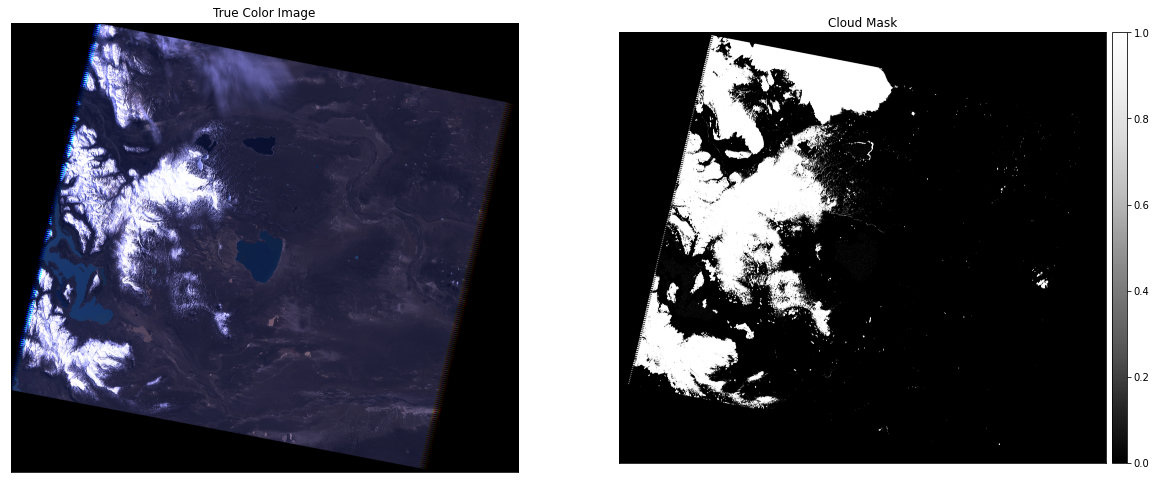

In [7]:
f, ax = plt.subplots(1, 2, figsize=(20, 20))
raster = rio.open(res_["raster_path"])
plot.plot_rgb(raster.read(), rgb=(2, 1, 0), ax=ax[0], stretch=True)
ax[0].set_title("True Color Image")
raster.close()

raster = rio.open(res_["raster_cloud_path"])
plot.plot_bands(raster.read(), ax=ax[1])
ax[1].set_title("Cloud Mask")
raster.close()

In [8]:
bbox = gpd.read_file("./data/cardiel-lake.geojson")
#
# now use bbox
# and do not write anything
product_id = "LT05_L1TP_230094_20111011_20161005_01_T1"

res_bbox = lp.execute(
    product_id,
    bbox=bbox,
    folder_proc_=PROD_INT_DIR,
    raster_return_open=True,
    write_file=None,
)

2022/02/09 11:52:46 - INFO - Processing on ./products-int/images-raw/LT05_L1TP_230094_20111011_20161005_01_T1 dir
2022/02/09 11:52:46 - INFO - Using clipping flag: True
2022/02/09 11:52:46 - INFO - PROCESSING band: B1
2022/02/09 11:52:46 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:52:46 - INFO - checking  ROI
2022/02/09 11:52:46 - INFO - checking roi match - full match: True - area: 1
2022/02/09 11:52:46 - INFO - clipping with Tight BBox
2022/02/09 11:52:46 - INFO - calibrating band
2022/02/09 11:52:46 - INFO - reprojecting band
2022/02/09 11:52:46 - INFO - PROCESSING band: B2
2022/02/09 11:52:46 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:52:46 - INFO - checking  ROI
2022/02/09 11:52:46 - INFO - checking roi match - full match: True - area: 1
2022/02/09 11:52:46 - INFO - clipping with Tight BBox
2022/02/09 11:52:46 - INFO - calibrating band
2022/02/09 11:52:46 - INFO - reprojecting band
2022/02/09 11:52:46 - INFO - PROCESSING

Text(0.5, 1.0, 'Cloud Mask')

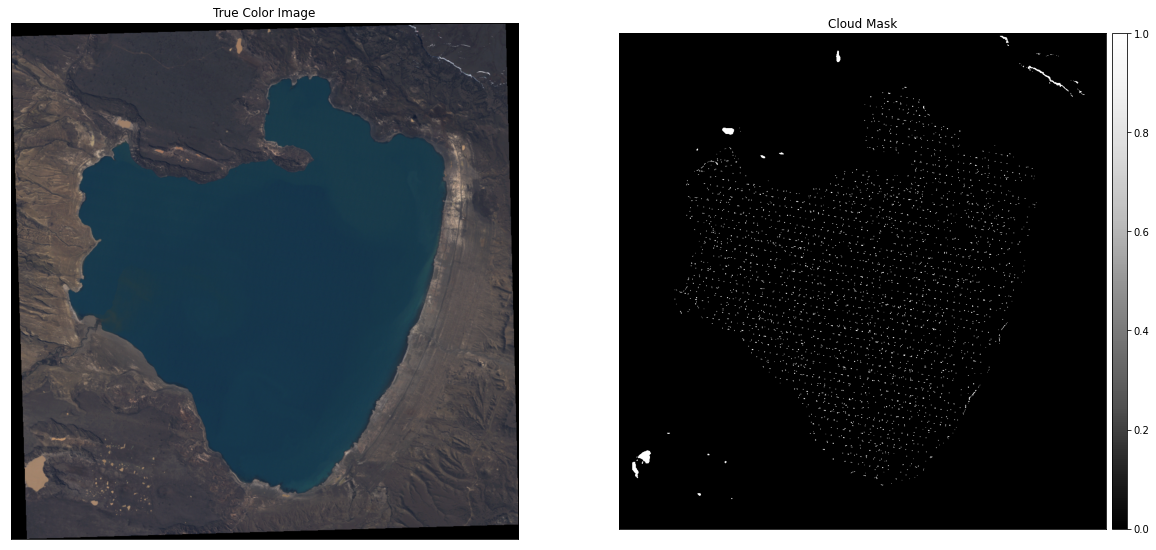

In [9]:
f, ax = plt.subplots(1, 2, figsize=(20, 20))
raster = res_bbox["raster"]
plot.plot_rgb(raster.read(), rgb=(2, 1, 0), ax=ax[0])
ax[0].set_title("True Color Image")

raster = res_bbox["raster_cloud"]
plot.plot_bands(raster.read(), ax=ax[1])
ax[1].set_title("Cloud Mask")

## Landsat 8 Image

### No bbox

We will query and calibrate the whole image and we will return it as a file (not in memory).

__NOTE__: Image Raw _LC08_L1TP_230094_20210904_20210904_01_RT_ or with the same path/row should exist on IMAGES_RAW dir. Please change _product_id_ if you have other image.

In [10]:
# Init Loader and query bands
LANDSAT8_BANDS = ["B2", "B3", "B4", "B5", "B6"]
lp = LandsatLoader(IMAGES_RAW, bands=LANDSAT8_BANDS, spacecraft=8)

2022/02/09 11:52:49 - INFO - Running on Landsat 8 data


That is, we have instantiated the Loader with:
- folder: IMAGE_RAW, the place where we look for products (see later)
- bands: list of bands that we require to be processed
- spacecraft: 5 or 8 (stands for Landsat 5 or 8)
- resolution: leave default @ 30 meters
- reflectance: leave default as True so calculate reflectance @ TOA (otherwise calculate radiance)

And now call the processor for the requested product-id:

In [11]:
product_id = "LC08_L1TP_230094_20210904_20210904_01_RT"
res_ = lp.execute(
    product_id,
    bbox=None,
    folder_proc_=PROD_INT_DIR,
    raster_return_open=False,
    write_file="_complete",
)

2022/02/09 11:52:49 - INFO - Processing on ./products-int/images-raw/LC08_L1TP_230094_20210904_20210904_01_RT dir
2022/02/09 11:52:50 - INFO - Using clipping flag: False
2022/02/09 11:52:50 - INFO - PROCESSING band: B2
2022/02/09 11:52:50 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:52:50 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:52:51 - INFO - calibrating band
2022/02/09 11:52:54 - INFO - reprojecting band
2022/02/09 11:53:06 - INFO - PROCESSING band: B3
2022/02/09 11:53:06 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:53:06 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:53:08 - INFO - calibrating band
2022/02/09 11:53:12 - INFO - reprojecting band
2022/02/09 11:53:28 - INFO - PROCESSING band: B4
2022/02/09 11:53:28 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:53:28 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:53:29 - INFO - calibrating band
2022/02/09 11

In [12]:
# check res_
res_

{'raster': None,
 'raster_cloud': None,
 'match': 'TOTAL',
 'raster_path': './products-int/images-crop/LC08_L1TP_230094_20210904_20210904_01_RT_complete.TIF',
 'raster_cloud_path': './products-int/images-crop/LC08_L1TP_230094_20210904_20210904_01_RT_CLOUDS_complete.TIF'}

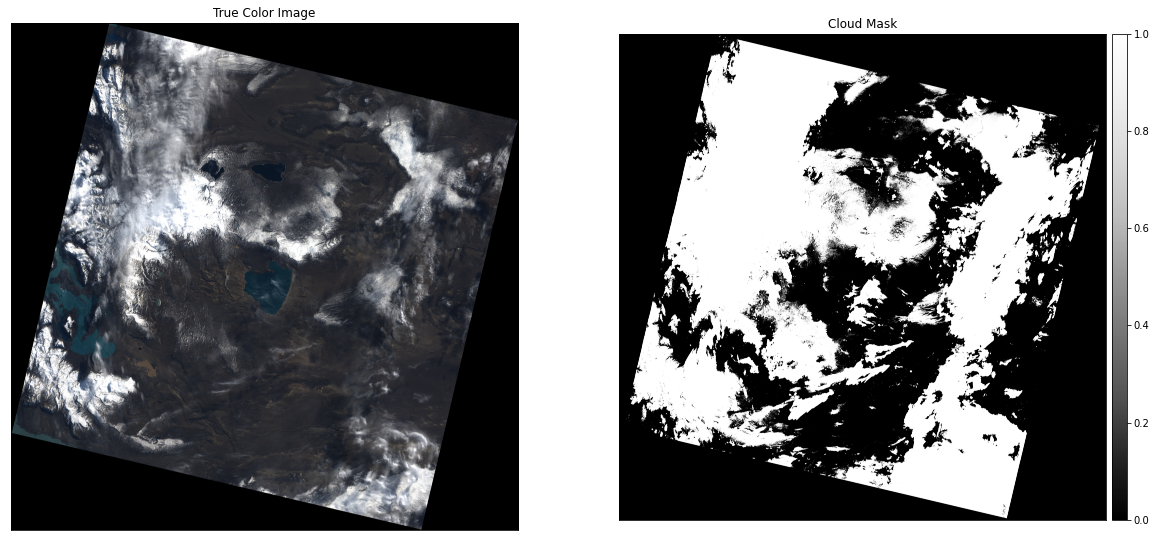

In [13]:
f, ax = plt.subplots(1, 2, figsize=(20, 20))
raster = rio.open(res_["raster_path"])
plot.plot_rgb(raster.read(), rgb=(2, 1, 0), ax=ax[0], stretch=True)
ax[0].set_title("True Color Image")
raster.close()

raster = rio.open(res_["raster_cloud_path"])
plot.plot_bands(raster.read(), ax=ax[1])
ax[1].set_title("Cloud Mask")
raster.close()

In [14]:
# now use bbox
bbox = gpd.read_file("./data/cardiel-lake.geojson")
# and do not write anything
product_id = "LC08_L1TP_230094_20210904_20210904_01_RT"

res_bbox = lp.execute(
    product_id,
    bbox=bbox,
    folder_proc_=PROD_INT_DIR,
    raster_return_open=True,
    write_file=None,
)

2022/02/09 11:55:44 - INFO - Processing on ./products-int/images-raw/LC08_L1TP_230094_20210904_20210904_01_RT dir
2022/02/09 11:55:44 - INFO - Using clipping flag: True
2022/02/09 11:55:44 - INFO - PROCESSING band: B2
2022/02/09 11:55:44 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:55:44 - INFO - checking  ROI
2022/02/09 11:55:44 - INFO - checking roi match - full match: True - area: 1
2022/02/09 11:55:44 - INFO - clipping with Tight BBox
2022/02/09 11:55:44 - INFO - calibrating band
2022/02/09 11:55:44 - INFO - reprojecting band
2022/02/09 11:55:44 - INFO - PROCESSING band: B3
2022/02/09 11:55:44 - INFO - resample: False - scale factor 1 - true pixel 30.0
2022/02/09 11:55:44 - INFO - checking  ROI
2022/02/09 11:55:44 - INFO - checking roi match - full match: True - area: 1
2022/02/09 11:55:44 - INFO - clipping with Tight BBox
2022/02/09 11:55:44 - INFO - calibrating band
2022/02/09 11:55:44 - INFO - reprojecting band
2022/02/09 11:55:45 - INFO - PROCESSING

In [15]:
res_bbox

{'raster': <open DatasetReader name='/vsimem/78e6181a-025c-450b-9183-006550dd66ab/78e6181a-025c-450b-9183-006550dd66ab.tif' mode='r'>,
 'raster_cloud': <open DatasetReader name='/vsimem/65275fd6-9be7-4deb-8675-f6102cead329/65275fd6-9be7-4deb-8675-f6102cead329.tif' mode='r'>,
 'match': 'TOTAL',
 'raster_path': None,
 'raster_cloud_path': None}

Text(0.5, 1.0, 'Cloud Mask')

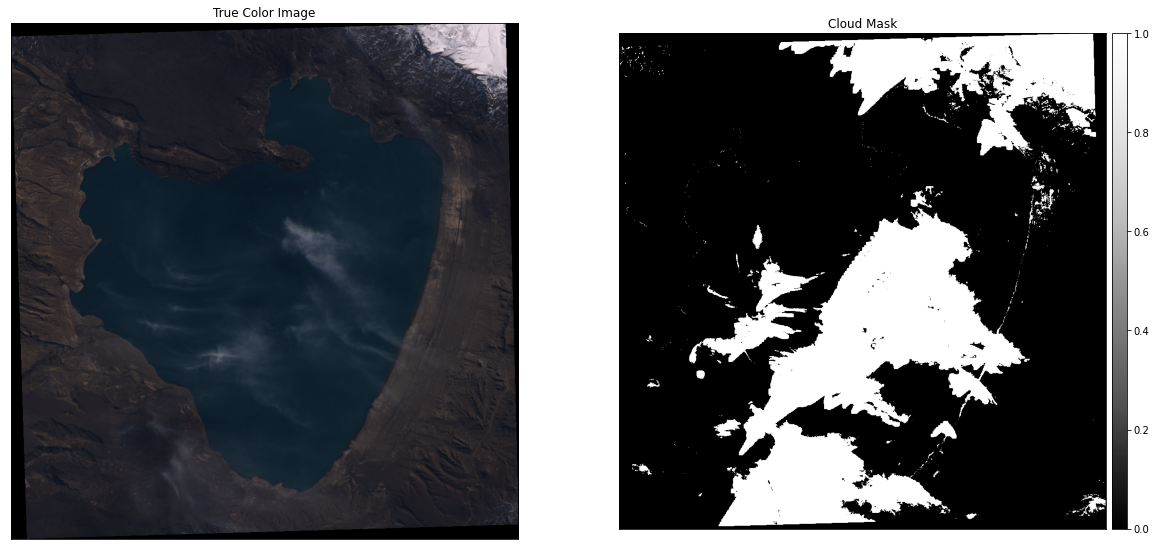

In [16]:
f, ax = plt.subplots(1, 2, figsize=(20, 20))
raster = res_bbox["raster"]
plot.plot_rgb(raster.read(), rgb=(2, 1, 0), ax=ax[0])
ax[0].set_title("True Color Image")

raster = res_bbox["raster_cloud"]
plot.plot_bands(raster.read(), ax=ax[1])
ax[1].set_title("Cloud Mask")

## Sentinel2  Image

### No bbox

We will query and calibrate the whole image and we will return it as a file (not in memory).

__NOTE__: Image Raw _S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE_ or with the same TILE should exist on IMAGES_RAW dir.

In [17]:
# Init Loader and query bands
SENTINEL2_BANDS = ["B02", "B03", "B04", "B08", "B11"]
lp = Sentinel2Loader(IMAGES_RAW, bands=SENTINEL2_BANDS, resolution=10)

2022/02/09 11:55:49 - INFO - Running on Sentinel 2 - l1c data


That is, we have instantiated the Loader with:
- folder: IMAGE_RAW, the place where we look for products (see later)
- bands: list of bands that we require to be processed
- resolution: pick 10 meters (default @ 20 meters)

And now call the processor for the requested product-id:

In [18]:
product_id = "S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE"
res_ = lp.execute(
    product_id,
    bbox=None,
    folder_proc_=PROD_INT_DIR,
    raster_return_open=False,
    write_file="_complete",
)

2022/02/09 11:55:49 - INFO - Processing on ./products-int/images-raw/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE dir
2022/02/09 11:55:49 - INFO - Using clipping flag: False
2022/02/09 11:55:49 - INFO - PROCESSING band: B02
2022/02/09 11:55:49 - INFO - resample: False - scale factor 1 - true pixel 10.0
2022/02/09 11:55:49 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:55:55 - INFO - calibrating band
2022/02/09 11:55:56 - INFO - reprojecting band
2022/02/09 11:55:57 - INFO - PROCESSING band: B03
2022/02/09 11:55:57 - INFO - resample: False - scale factor 1 - true pixel 10.0
2022/02/09 11:55:57 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:56:03 - INFO - calibrating band
2022/02/09 11:56:03 - INFO - reprojecting band
2022/02/09 11:56:05 - INFO - PROCESSING band: B04
2022/02/09 11:56:05 - INFO - resample: False - scale factor 1 - true pixel 10.0
2022/02/09 11:56:05 - INFO - no bbox - full match: True - area: 1
2022/02/09 11:56:10 - INFO - ca

In [19]:
# check res_
res_

{'raster': None,
 'raster_cloud': None,
 'match': 'TOTAL',
 'raster_path': './products-int/images-crop/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059_complete.TIF',
 'raster_cloud_path': './products-int/images-crop/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059_CLOUDS_complete.TIF'}

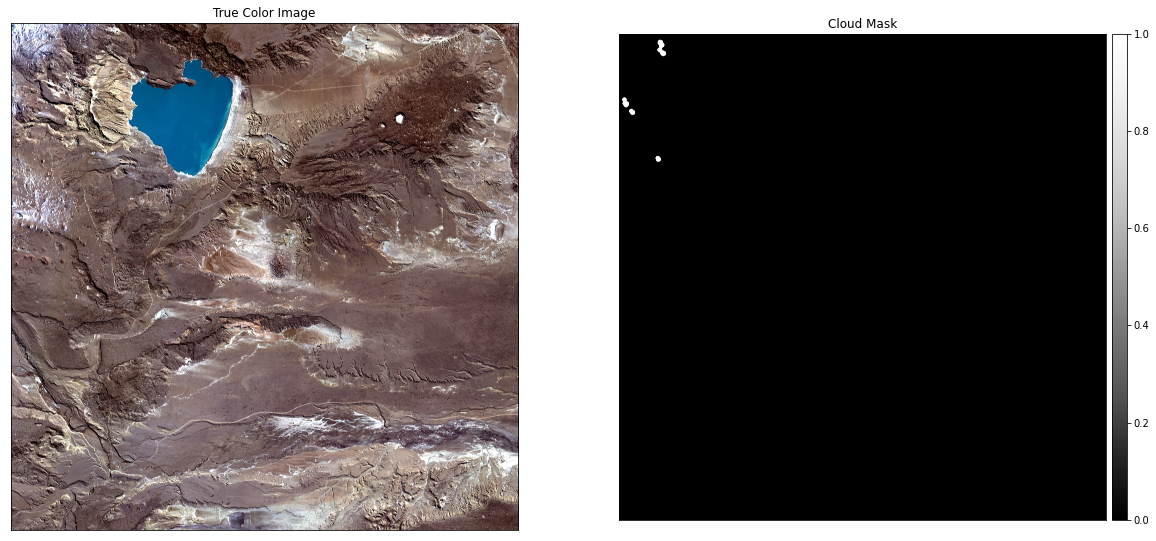

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20, 20))
raster = rio.open(res_["raster_path"])
plot.plot_rgb(raster.read(), rgb=(2, 1, 0), ax=ax[0], stretch=True)
ax[0].set_title("True Color Image")
raster.close()

raster = rio.open(res_["raster_cloud_path"])
plot.plot_bands(raster.read(), ax=ax[1])
ax[1].set_title("Cloud Mask")
raster.close()

In [21]:
# now use bbox
bbox = gpd.read_file("./data/cardiel-lake.geojson")
# and do not write anything
product_id = "S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE"

res_bbox = lp.execute(
    product_id,
    bbox=bbox,
    folder_proc_=PROD_INT_DIR,
    raster_return_open=True,
    write_file=None,
)

2022/02/09 11:58:23 - INFO - Processing on ./products-int/images-raw/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE dir
2022/02/09 11:58:23 - INFO - Using clipping flag: True
2022/02/09 11:58:23 - INFO - PROCESSING band: B02
2022/02/09 11:58:23 - INFO - resample: False - scale factor 1 - true pixel 10.0
2022/02/09 11:58:23 - INFO - checking  ROI
2022/02/09 11:58:23 - INFO - checking roi match - full match: True - area: 1
2022/02/09 11:58:23 - INFO - clipping with Tight BBox
2022/02/09 11:58:25 - INFO - calibrating band
2022/02/09 11:58:25 - INFO - reprojecting band
2022/02/09 11:58:25 - INFO - PROCESSING band: B03
2022/02/09 11:58:25 - INFO - resample: False - scale factor 1 - true pixel 10.0
2022/02/09 11:58:25 - INFO - checking  ROI
2022/02/09 11:58:25 - INFO - checking roi match - full match: True - area: 1
2022/02/09 11:58:25 - INFO - clipping with Tight BBox
2022/02/09 11:58:26 - INFO - calibrating band
2022/02/09 11:58:26 - INFO - reprojecting band
2022/02/09 1

In [22]:
res_bbox

{'raster': <open DatasetReader name='/vsimem/87bc7bef-89fe-44c3-9744-069236c101f0/87bc7bef-89fe-44c3-9744-069236c101f0.tif' mode='r'>,
 'raster_cloud': <open DatasetReader name='/vsimem/8b2dc93b-4db4-470b-a204-147fb9326469/8b2dc93b-4db4-470b-a204-147fb9326469.tif' mode='r'>,
 'match': 'TOTAL',
 'raster_path': None,
 'raster_cloud_path': None}

Text(0.5, 1.0, 'Cloud Mask')

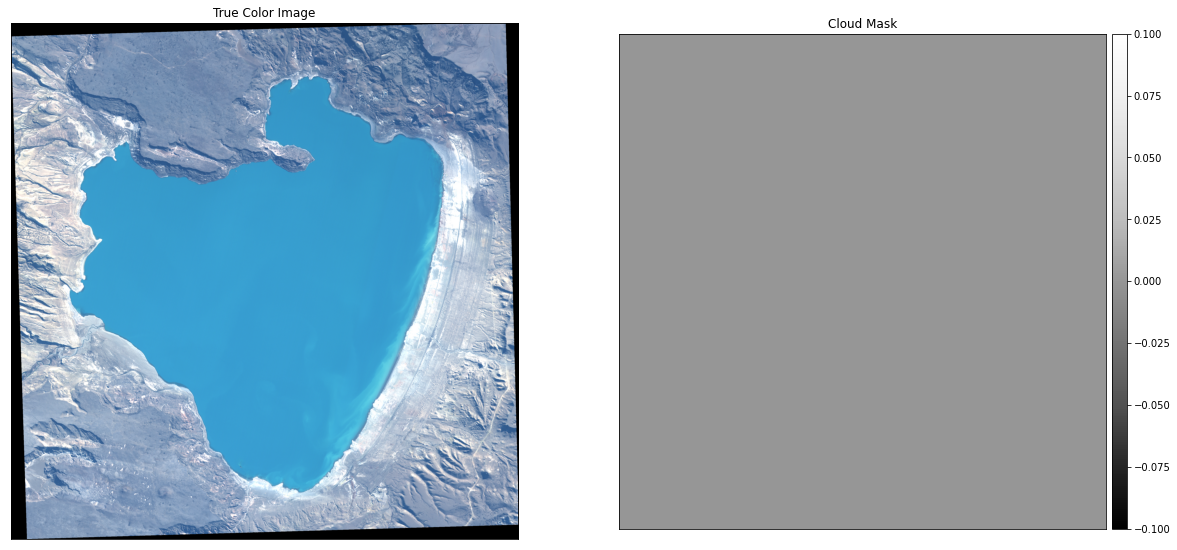

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 20))
raster = res_bbox["raster"]
plot.plot_rgb(raster.read(), rgb=(2, 1, 0), ax=ax[0], stretch=True)
ax[0].set_title("True Color Image")

raster = res_bbox["raster_cloud"]
plot.plot_bands(raster.read(), ax=ax[1])
ax[1].set_title("Cloud Mask")